# Solve Classification task using Unsupervised learning with the autoencoder method

In [1]:
# Download the helper functions
!wget https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py

--2023-08-28 05:16:03--  https://raw.githubusercontent.com/prvpitawala/ML_help/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-28 05:16:03 (58.2 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [2]:
# import the libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers  import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# load and split to the data set to the train and the test set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
#see the first image of the training data set
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

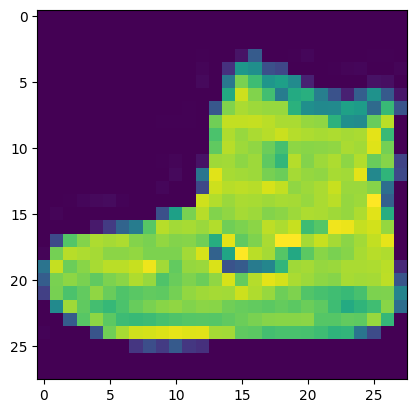

In [7]:
# Lets see the first image of the image data set
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [9]:
# pre-process the data
train_images = train_images/255.0
test_images = test_images/255.0
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images  = np.reshape(test_images, (len(test_images), 28, 28, 1))

train_images.shape

(60000, 28, 28, 1)

In [10]:
# Difine the autoencoder architecture
input_layer = Input(shape=(28, 28, 1))
flatten_layer = Flatten()(input_layer)

encoded     = Dense(256, activation = "relu")(flatten_layer)
decoded     = Dense(784, activation = "sigmoid")(encoded)

reshaped    = Reshape((28, 28, 1))(decoded)
autoencoder = Model(inputs = input_layer, outputs = reshaped)


# Compile the model
autoencoder.compile(loss= "binary_crossentropy",
                    optimizer = "adam")


# Fit the auto encoder
autoencoder.fit(train_images,
                train_images,
                epochs = 30,
                batch_size=128,
                validation_split=0.2)


Epoch 1/30
375/375 [==============================] - 6s 14ms/step - loss: 0.3335 - val_loss: 0.2911
Epoch 2/30
375/375 [==============================] - 5s 13ms/step - loss: 0.2808 - val_loss: 0.2768
Epoch 3/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2717 - val_loss: 0.2706
Epoch 4/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2672 - val_loss: 0.2669
Epoch 5/30
375/375 [==============================] - 6s 16ms/step - loss: 0.2641 - val_loss: 0.2646
Epoch 6/30
375/375 [==============================] - 5s 13ms/step - loss: 0.2621 - val_loss: 0.2629
Epoch 7/30
375/375 [==============================] - 5s 15ms/step - loss: 0.2604 - val_loss: 0.2616
Epoch 8/30
375/375 [==============================] - 5s 14ms/step - loss: 0.2592 - val_loss: 0.2606
Epoch 9/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2583 - val_loss: 0.2596
Epoch 10/30
375/375 [==============================] - 6s 16ms/step - loss: 0.2575 - val_lo

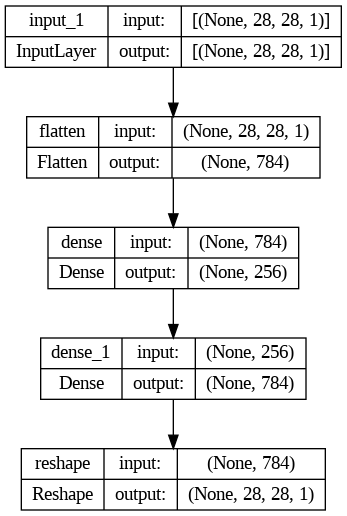

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, show_shapes=True)

In [13]:
# get predictions only dimentional reducted layer.
# then input is input layers and the output getting from the encoded layer.
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_train_images = encoder.predict(train_images)
encoded_test_images  = encoder.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
# lets get the encoded trainig image shape
encoded_train_images.shape

(60000, 256)

In [15]:
# Build a classifier on top of the learned features
# input is encoded trained images
# then the input shape is (256,)

classifier = tf.keras.Sequential([
    Dense(256, activation = "relu", input_shape=(256,)),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax")
])

classifier.compile(loss = "sparse_categorical_crossentropy",
                   optimizer = "adam",
                   metrics=["accuracy"])
classifier.fit(encoded_train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.5536 - accuracy: 0.8011 - val_loss: 0.4692 - val_accuracy: 0.8207
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4012 - accuracy: 0.8531 - val_loss: 0.4109 - val_accuracy: 0.8471
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3627 - accuracy: 0.8671 - val_loss: 0.3924 - val_accuracy: 0.8488
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3336 - accuracy: 0.8768 - val_loss: 0.3567 - val_accuracy: 0.8698
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3183 - accuracy: 0.8819 - val_loss: 0.3362 - val_accuracy: 0.8751
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3117 - accuracy: 0.8834 - val_loss: 0.3393 - val_accuracy: 0.8742
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2951 - accuracy: 0.8889 - val_loss: 0.3332 - val_accuracy: 0.8772
Epoc

In [18]:
# get the test accuracy
test_loss, test_accuracy = classifier.evaluate(encoded_test_images, test_labels)
test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8756


0.8755999803543091

In [25]:
# Get the classifire predictions
predictions = classifier.predict(encoded_test_images)
predictions

313/313 [==============================] - 1s 3ms/step


array([[5.94793221e-07, 1.81424777e-08, 1.88826776e-09, ...,
        1.05169085e-04, 1.93976135e-07, 9.99195874e-01],
       [2.40759533e-07, 3.74446839e-13, 9.99908864e-01, ...,
        5.63845715e-12, 7.77568218e-11, 7.43562677e-12],
       [2.43416067e-16, 9.99999940e-01, 7.27118280e-19, ...,
        5.16595896e-28, 3.02516475e-12, 1.78351527e-23],
       ...,
       [1.50741255e-06, 7.69472853e-12, 3.07973039e-07, ...,
        4.74975215e-09, 9.99995291e-01, 1.51277151e-11],
       [5.05717856e-10, 9.99998510e-01, 2.77566208e-12, ...,
        1.39682609e-18, 1.46611683e-06, 5.82486262e-14],
       [9.63958882e-06, 1.74628880e-08, 3.19548872e-06, ...,
        2.14584405e-03, 8.44517548e-04, 1.69567866e-05]], dtype=float32)

In [27]:
# get the maximum values of the predction arry
y_preds = predictions.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
# lets see the confusion metrix
from sklearn.metrics import confusion_matrix

metrix = confusion_matrix(y_preds, test_labels)
metrix

array([[845,   1,  19,  20,   1,   0, 138,   0,   5,   1],
       [  4, 974,   3,  11,   1,   0,   2,   0,   2,   0],
       [ 11,   5, 826,  28, 117,   0, 108,   0,   3,   0],
       [ 34,  14,   6, 848,  11,   1,  20,   0,   5,   0],
       [  5,   3,  93,  66, 838,   0,  98,   0,   6,   0],
       [  0,   0,   0,   0,   0, 979,   0,  45,   3,  15],
       [ 97,   3,  52,  24,  32,   0, 624,   0,   7,   0],
       [  0,   0,   0,   0,   0,  10,   0, 886,   1,  15],
       [  4,   0,   1,   3,   0,   1,  10,   1, 967,   0],
       [  0,   0,   0,   0,   0,   9,   0,  68,   1, 969]])

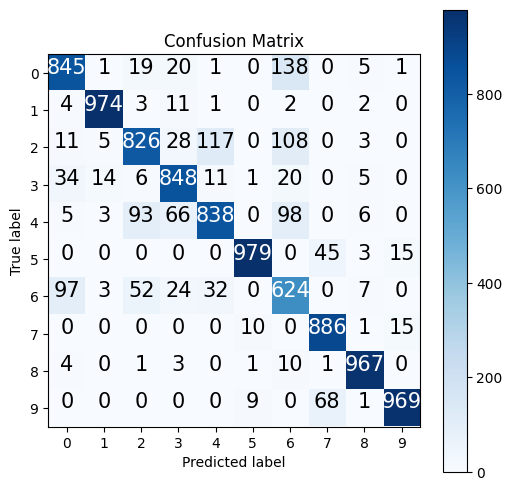

In [31]:
# Plot the confusion metrix
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_preds, test_labels, figsize=(6,6))

when we see our confussion matrix we can tell our autoencoder well classifi the paterns of the image set.
and the prediction aldso good. predictin accuracy is 0.88

end